MachineLeaningCourse vol.8
# サポートベクターマシン

サポートベクターマシン（Support Vector Machine：SVM）は広く利用されている強力な学習アルゴリズムの１つであり、パーセプトロンの拡張と見なすことが出来きます。

SVMは__マージン最大化__という考えで、高い汎化性能を持つことが知られています。マージンとは、超平面とこの超平面に最も近いトレーニングサンプルとの間の距離として定義されます。

今回は、SVMがどのような考えでデータを識別するように学習を行うのかを説明していきたいと思います。

SVMは、カーネル法を用いることで非線形への拡張ができるので、__線形分離不可能な場合でも適用可能__になる。それゆえ、高い性能と人気を誇るアルゴリズムです。

### 2クラス分類
２つのクラスを分ける超平面は無数にあります。その際に、最もよい超平面とは汎化性能が高いものです。

例えば、パーセプトロンで以下のようなクラスの端のギリギリを通る決定境界（緑の線）を引いてしまった場合、新しいサンプルに対応できない可能性が高いです。
![](https://s3.amazonaws.com/ai-standard/pic7-2.png)

そこで考えられたのが、SVMです。
SVMでは図のように、__2つのグループ間の最も距離の離れた箇所（最大マージン）を見つけ出し、その真ん中に識別の線を引きます__。

マージンとは、引いた境界線と、データの最短距離のことを言います。
超平面に最も近いトレーニングサンプルは__サポートベクトル__と呼びます。
![](https://s3.amazonaws.com/ai-standard/pic7-1.png)

このように__最大マージンの真ん中に引いた線__が、最も汎化能力が高い事が期待出来ます。

### 最大マージンの求め方
まずは、決定境界に沿った正(pos)と負(neg)の超平面は以下のように定義できます。

$$w_0 + w^Tx_{pos} = 1$$

$$w_0 + w^Tx_{neg} = -1$$

上記の式を引き算すると、以下です。

$$w^T(x_{pos} - x_{neg}) = 2$$

ここで、ベクトルの長さを定義して、上記の式を__標準化__します。

$$\frac {w^T(x_{pos} - x_{neg})} {||w||} = \frac{2}{||w||}$$

$$ただし、||w|| = \sqrt[]{\sum^{m}_{j=1} w^2_j}$$

この式の左辺は、__正の超平面と負の超平面の距離__であると解釈できる。これは最大化したいマージンそのものです。

SVMの目的関数を最大化する問題は、$\frac{2}{||w||}$の最大化となります。

しかし、$\frac{2}{||w||}$は計算が難しいので、逆数をとって２乗した$\frac{1}{2}||w||^2$を最小化する方が簡単です。



そして、SVMにはサンプルが正しく分類されているという__制約__があります。

$$w_0 + w^Tx^{(i)} \geq 1$$

$$w_0 + w^Tx^{(i)} < -1$$

これら２つの式は、基本的には負のサンプルはすべて負の超平面側にあり、正のサンプルはすべて正の超平面の後ろに収まることを意味しています。

２つの式をまとめると、

$$y^{(i)}(w_0 + w^Tx^{(i)}) \geq 1$$

となります。（$y^{(i)}=-1,1$）


これらをまとめると、SVMが解く問題は以下です。

$$min. \  \frac{1}{2}||w||^2$$

$$s.t.\  y^{(i)}(w_0 + w^Tx^{(i)}) \geq 1$$

#### スラック変数の導入
これまで見てきたようにSVMは、__データがマージン内に入らないことを前提__としています。

しかし、現実的にそうなるようなデータセットはなかなかありません。したがって、__データの誤分類を許すようにSVMを修正__します。

そのためにまず、__スラック変数__  $\xi$をデータごとに導入します。

スラック変数は、データが正しく分類されかつマージン境界上または外側にある場合は0、正しく分類されているがマージン内に侵入してしまっているデータは 0 < $\xi $ <= 1、分類境界を越えて誤分類されてしまったデータは $\xi$ > 1となります。

$$w_0 + w^Tx^{(i)} \geq 1 - \xi^{(i)}$$

$$w_0 + w^Tx^{(i)} < - 1+ \xi^{(i)}$$

したがって、最小化すべき対象は以下の様になります。

$$ \frac{1}{2}||w||^2 + C \Bigl(\sum_{i} \xi^{(i)} \Bigr)$$

あとは、変数Cを使って誤分類のペナルティを抑制します。Cの値が大きい場合は誤分類のペナルティが大きいことを意味し、Cの値が小さい場合は誤分類に対してより寛大であることを意味します。

式の意味を簡単に解説すると、「誤分類が多いほどスラック変数の合計は大きくなるので最小化するのに妨げとなります。なので、最小化しようとするとなるべく誤分類が少なくなるようにパラメータwを調整しようとする」という感じです。

### scikit-learnでSVMを実践
##### Irisデータセットの読み込み

In [11]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [2]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
scaler.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)

In [5]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

##### 線形SVCの適応

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_std, y_train)

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


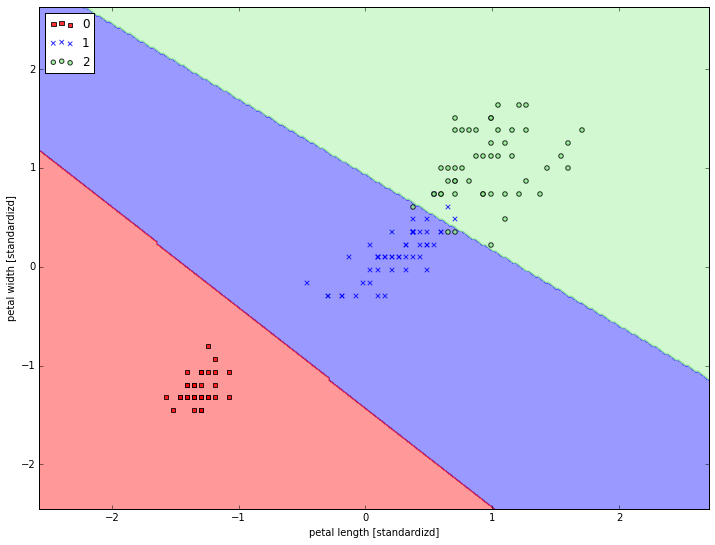

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
    
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(12, 9))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm)
plt.xlabel("petal length [standardizd]")
plt.ylabel("petal width [standardizd]")

plt.legend(loc = "upper left")
plt.show()

### 非線形問題へカーネルSVMを適用する
SVMのメリットとして、非線形分類の問題を解くために「__カーネル化__」するのが容易であることがあげられます。

まずは、非線形分類問題とはどういうものなのかを、データセットを作りながら確認していきます。

numpyのlogical_xor関数を使ってXORのデータを作成します。

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


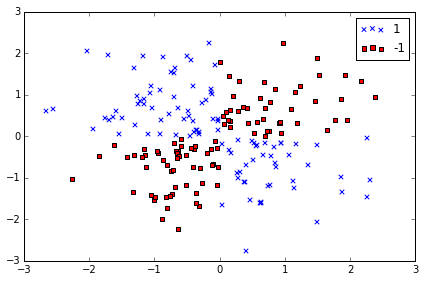

In [15]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

いままでのロジスティック回帰や線形SVMなどのモデルでは、このデータセットを上手に分類することは難しいです。

そうした__線形分離不可能なデータを処理__するのが、__カーネル法__の発想です。
カーネル法とは、射影関数$\Phi(・)$を用いて、それらの組み合わせを高次元空間に射影して、線形分離できるようにすることです。


以下の図を見るとイメージしやすいでしょう。
グラフに示されている２つのクラスを線形超平面を使って分割できるようになります。それを元の特徴空間に射影すると、__非線形の決定境界__になります。
![](https://s3.amazonaws.com/ai-standard/pic7-3.png)

このような射影手法には新しい特徴量を生成する計算コストが非常に高いという問題点がある。ここで役に立つのが「カーネルトリック」です。

カーネルとは、ざっくり言うと２つのサンプル間の__類似度__を表すものです。

まず、計算式の中で一番計算コストが高いのは、ベクトルのドット積($x^{(i)T}x^{(j)}$)です。SVMの中に含まれるこの計算を普通にすると計算量が高く付くため、ベクトルのドット積をカーネル関数で置き換えます。

すると、式からベクトルの要素がなくなります。つまり、特徴量からなにかの値を返すカーネル関数を決めると、SVMはそこから最適化問題を解き、データを２つに分類するモデルを導出することができます。

これを__カーネルトリック__と呼びます。

最も広く使われているカーネルの一つは、動径基底関数カーネル（rbfカーネル・ガウスカーネル）と呼ばれるものです。

$$k(x^{(i)} ,x^{(j)}) = \exp \Bigl ( - \gamma \ ||x^{(i)} - x^{(j)}||\Bigr )$$

ただし、$\gamma = \frac{1}{2\sigma^2}$となります。ここでの$\gamma$は最適化されるハイパーパラメータです。

$\gamma$__の値を小さくすると、トレーニングデータによりフィットするように計算されます。__

ではここから、XORデータを使って、RBFカーネルの凄さを見ていきましょう。

まずは比較対象として、線形SVMを使って、学習させてみます。

#### XORデータ｜線形SVM

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


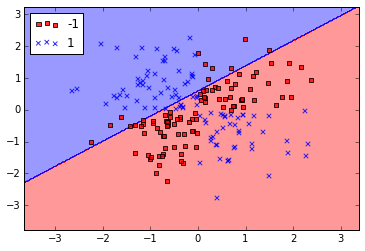

In [16]:
linear_svm = SVC(kernel='linear', random_state=0, gamma=0.10, C=10.0)
linear_svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=linear_svm)

plt.legend(loc='upper left')
plt.show()

#### XORデータ｜カーネルSVM

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


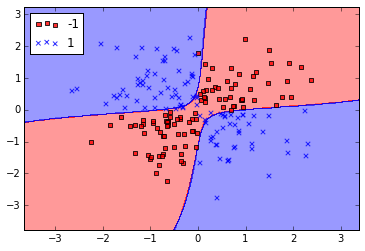

In [17]:
rbf_svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
rbf_svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=rbf_svm)

plt.legend(loc='upper left')
plt.show()

このように、RBFカーネルを使用すると、綺麗にXORデータが分類できることが分かりました。

ここで気をつけておきたいのは、$\gamma$のチューニングによってトレーニングデータにうまくフィットさせすぎないことが大切です。
過学習を抑制し、$\gamma$を最適な数値に設定できるように工夫が必要です。

次回からは、汎化能力をあげるために必要な、評価指標や交差検定などの概念を勉強していきます。